In [1]:
import os
# from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


from data_fixing import *
from train_model import *
import tensorflowjs as tfjs
# import tensorflow as tf



2025-03-13 19:14:06.517927: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 19:14:06.518013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 19:14:06.598549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 19:14:06.767200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 19:14:08.073591: W tensorflow/compiler/tf2

In [2]:
data = np.load('../images_as_npz/pokemon_rgb_no_skipped_imgs128x128.npz')
images = data['images']
print(f"Loaded images with shape: {images.shape}")
labels = data['labels']
print(f"Loaded labels with shape: {labels.shape}")


Loaded images with shape: (15752, 128, 128, 3)
Loaded labels with shape: (15752,)


In [3]:
# Count occurrences of each unique label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Find the Pokémon with the least amount of labels
min_label_index = np.argmin(label_counts)
min_label = unique_labels[min_label_index]
min_label_count = label_counts[min_label_index]

print(f"Pokemon with the least amount of labels: {min_label}")
print(f"Number of occurrences: {min_label_count}")

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=12366)

train_dataset, val_dataset = create_augmented_train_val_datasets(X_train, y_train, X_test, y_test)

Pokemon with the least amount of labels: 0
Number of occurrences: 53


2025-03-13 19:14:21.404580: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-13 19:14:21.607368: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-13 19:14:21.607433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-13 19:14:21.609836: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-13 19:14:21.609907: I external/local_xla/xla/stream_executor

In [4]:
model = tf.keras.models.load_model('./models/normalize_model1.h5')

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 re_lu_5 (ReLU)              (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 61, 61, 64)       

In [9]:
index_to_pokemon = {0: 'Abra', 1: 'Aerodactyl', 2: 'Alakazam', 3: 'Arbok', 4: 'Arcanine', 5: 'Articuno', 6: 'Beedrill', 7: 'Bellsprout', 8: 'Blastoise', 9: 'Bulbasaur', 10: 'Butterfree', 11: 'Caterpie', 12: 'Chansey', 13: 'Charizard', 14: 'Charmander', 15: 'Charmeleon', 16: 'Clefable', 17: 'Clefairy', 18: 'Cloyster', 19: 'Cubone', 20: 'Dewgong', 21: 'Diglett', 22: 'Ditto', 23: 'Dodrio', 24: 'Doduo', 25: 'Dragonair', 26: 'Dragonite', 27: 'Dratini', 28: 'Drowzee', 29: 'Dugtrio', 30: 'Eevee', 31: 'Ekans', 32: 'Electabuzz', 33: 'Electrode', 34: 'Exeggcute', 35: 'Exeggutor', 36: 'Farfetchd', 37: 'Fearow', 38: 'Flareon', 39: 'Gastly', 40: 'Gengar', 41: 'Geodude', 42: 'Gloom', 43: 'Golbat', 44: 'Goldeen', 45: 'Golduck', 46: 'Graveler', 47: 'Grimer', 48: 'Growlithe', 49: 'Gyarados', 50: 'Haunter', 51: 'Hitmonchan', 52: 'Hitmonlee', 53: 'Horsea', 54: 'Hypno', 55: 'Ivysaur', 56: 'Jigglypuff', 57: 'Jolteon', 58: 'Jynx', 59: 'Kabutops', 60: 'Kadabra', 61: 'Kakuna', 62: 'Kangaskhan', 63: 'Kingler', 64: 'Koffing', 65: 'Lapras', 66: 'Lickitung', 67: 'Machamp', 68: 'Machoke', 69: 'Machop', 70: 'Magikarp', 71: 'Magmar', 72: 'Magnemite', 73: 'Magneton', 74: 'Mankey', 75: 'Marowak', 76: 'Meowth', 77: 'Metapod', 78: 'Mew', 79: 'Mewtwo', 80: 'Moltres', 81: 'MrMime', 82: 'Nidoking', 83: 'Nidoqueen', 84: 'Nidorina', 85: 'Nidorino', 86: 'Ninetales', 87: 'Oddish', 88: 'Omanyte', 89: 'Omastar', 90: 'Parasect', 91: 'Pidgeot', 92: 'Pidgeotto', 93: 'Pidgey', 94: 'Pikachu', 95: 'Pinsir', 96: 'Poliwag', 97: 'Poliwhirl', 98: 'Poliwrath', 99: 'Ponyta', 100: 'Porygon', 101: 'Primeape', 102: 'Psyduck', 103: 'Raichu', 104: 'Rapidash', 105: 'Raticate', 106: 'Rattata', 107: 'Rhydon', 108: 'Rhyhorn', 109: 'Sandshrew', 110: 'Sandslash', 111: 'Scyther', 112: 'Seadra', 113: 'Seaking', 114: 'Seel', 115: 'Shellder', 116: 'Slowbro', 117: 'Slowpoke', 118: 'Snorlax', 119: 'Spearow', 120: 'Squirtle', 121: 'Starmie', 122: 'Staryu', 123: 'Tangela', 124: 'Tauros', 125: 'Tentacool', 126: 'Tentacruel', 127: 'Vaporeon', 128: 'Venomoth', 129: 'Venonat', 130: 'Venusaur', 131: 'Victreebel', 132: 'Vileplume', 133: 'Voltorb', 134: 'Vulpix', 135: 'Wartortle', 136: 'Weedle', 137: 'Weepinbell', 138: 'Weezing', 139: 'Wigglytuff', 140: 'Zapdos', 141: 'Zubat'}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4631782..0.59371936].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.55714464..0.6090046].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4083987..0.7945034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.5712997..1.4344378].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.69416165..1.837282].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.8098717..1.6651015].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.50002235

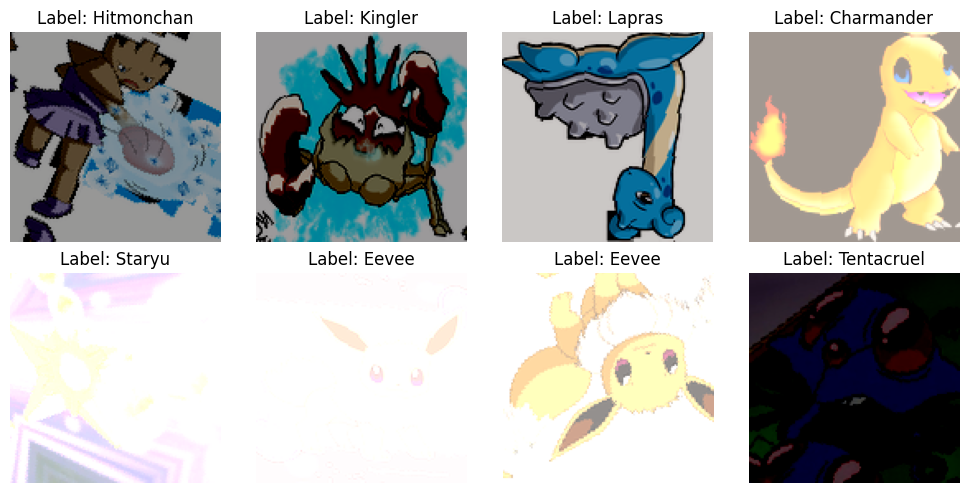

In [26]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the train dataset
images_batch, labels_batch = next(iter(train_dataset))

# Number of images in the batch
num_images = 8  

# Set up the figure and axis grid (2x4 layout)
fig, axes = plt.subplots(2, 4, figsize=(10, 5))  

for i, ax in enumerate(axes.flat):  
    ax.imshow(images_batch[i].numpy())  # Convert tensor to NumPy
    ax.set_title(f"Label: {index_to_pokemon[labels_batch[i].numpy()]}")  
    ax.axis("off")  # Hide axes for a cleaner look

plt.tight_layout()  # Adjust spacing
plt.show()


In [ ]:
# from tf_explain.core.grad_cam import GradCAM

# explainer = GradCAM()
# grid = explainer.explain(validation_data, model, class_index=0)
# plt.imshow(grid)


1/1 [==============================] - 0s 97ms/step
Layer: conv2d_4 - Activation shape: (1, 126, 126, 32)


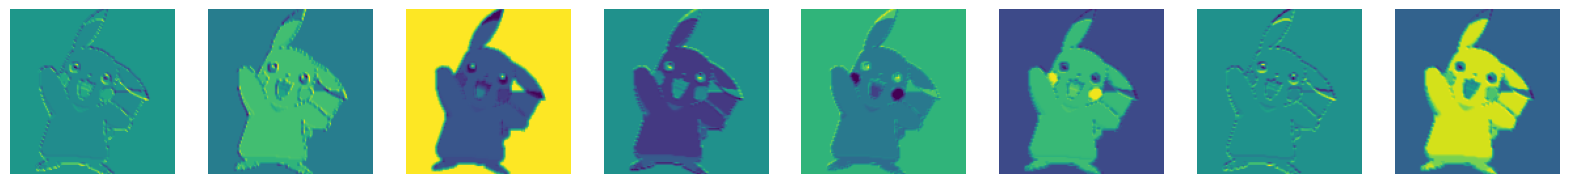

Layer: max_pooling2d_4 - Activation shape: (1, 63, 63, 32)


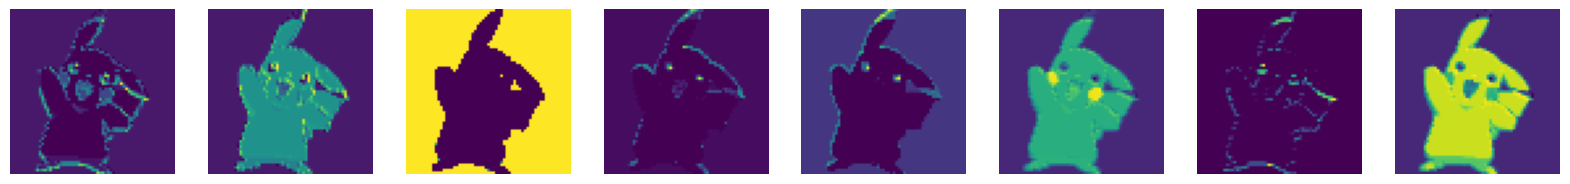

Layer: conv2d_5 - Activation shape: (1, 61, 61, 64)


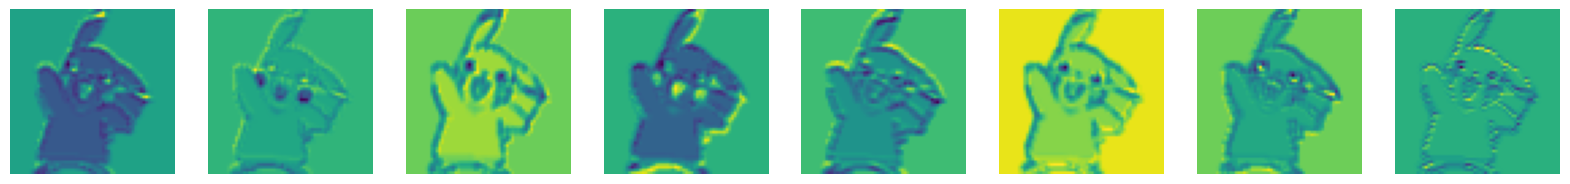

Layer: max_pooling2d_5 - Activation shape: (1, 30, 30, 64)


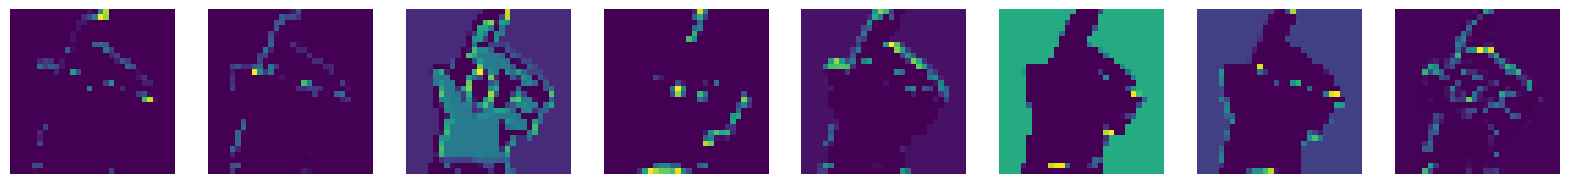

Layer: conv2d_6 - Activation shape: (1, 28, 28, 128)


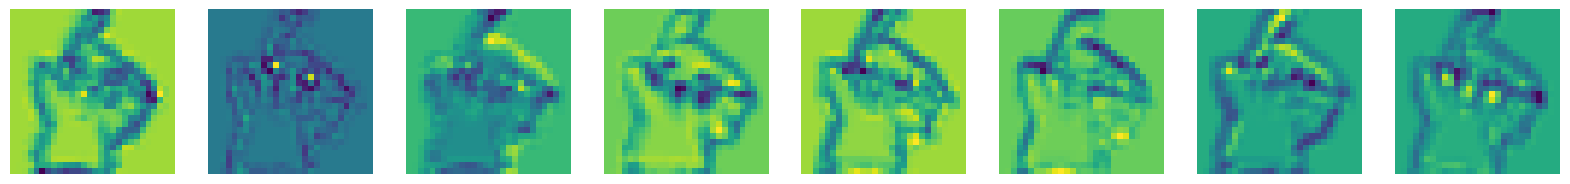

Layer: max_pooling2d_6 - Activation shape: (1, 14, 14, 128)


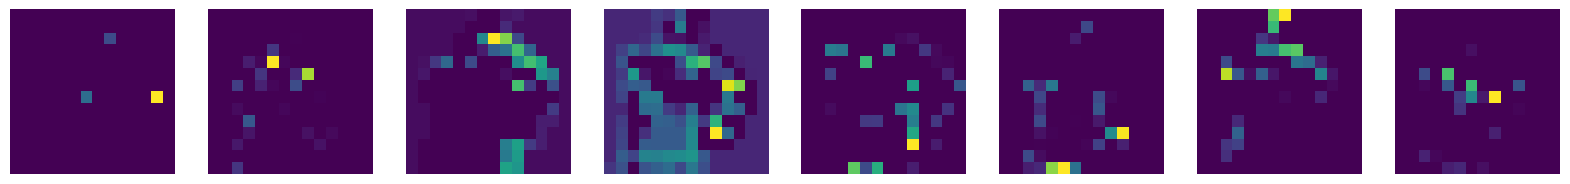

Layer: conv2d_7 - Activation shape: (1, 12, 12, 128)


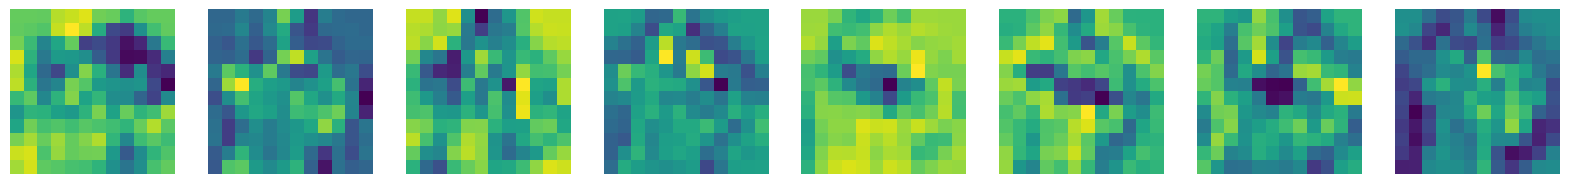

Layer: max_pooling2d_7 - Activation shape: (1, 6, 6, 128)


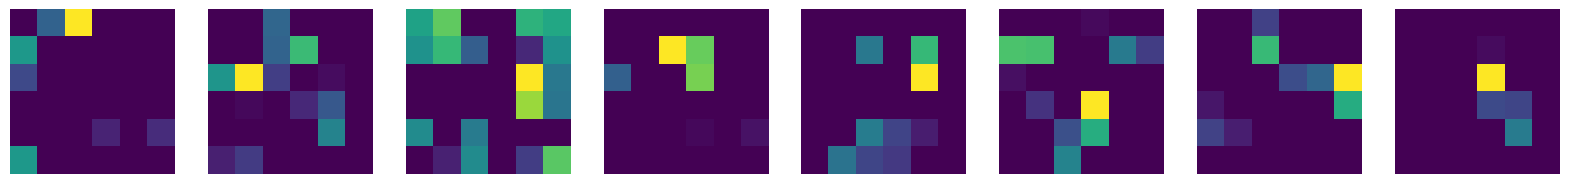

Layer: global_average_pooling2d_1 - Activation shape: (1, 128)
Skipping global_average_pooling2d_1 - Shape: (1, 128)


In [29]:


# Select an image (make sure it's preprocessed correctly)
image = tf.keras.preprocessing.image.load_img("CNN_vis.png", target_size=(128, 128))
image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Define a new model that outputs activations from each layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]  # Choose specific layers
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get feature maps
activations = activation_model.predict(image)

# Plot feature maps for each convolutional layer
for layer_name, activation in zip([layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name], activations):
    print(f"Layer: {layer_name} - Activation shape: {activation.shape}")
    if len(activation.shape) == 4:  # Only visualize 4D feature maps
            num_filters = activation.shape[-1]
            fig, axes = plt.subplots(1, min(num_filters, 8), figsize=(20, 5))

            for j in range(min(num_filters, 8)):  # Show first 8 filters
                ax = axes[j]
                ax.imshow(activation[0, :, :, j], cmap="viridis")  # Show single filter
                ax.axis("off")

            plt.show()
    else:
        print(f"Skipping {layer_name} - Shape: {activation.shape}")